---
# 타이타닉 생존자 예측
---

진행순서
- Part1. 탐색적 데이터 분석 EDA
- Part2. 데이터 전처리
- Part3. 모델링

컬럼 정보

- PassengerId : 고객번호
- Survived : 생존여부 / 0=No, 1=Yes
- Pclass : Ticket Class, 1=1st, 2=2nd, 3=3rd
- Name : 이름 => 결혼여부, 가족여부 확인
- Sex : 성별
- Age : 나이
- SibSp : 형제, 배우자의 숫자
- Parch : 부모, 자식
- Ticket : Ticket number
- Fare : 금액,비용
- Cabin : 방 번호
- Embarked : 선착장 / C=Cherbourg, Q=Queenstown, S=Southampton

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')

In [3]:
train_org = pd.read_csv('../data/titanic/train.csv')
test_org = pd.read_csv('../data/titanic/test.csv')

In [4]:
train_df = train_org.copy()
test_df = test_org.copy()

---
## Part1: Exploratory Data Analysis(EDA)
---

In [5]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
train_df.shape

(891, 12)

In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#

- Nan값 확인

In [10]:
# train data Nan 값 
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
# test data Nan 값 확인
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

- 생존자 비율 확인

In [12]:
palette1 = sns.color_palette('hls',2)

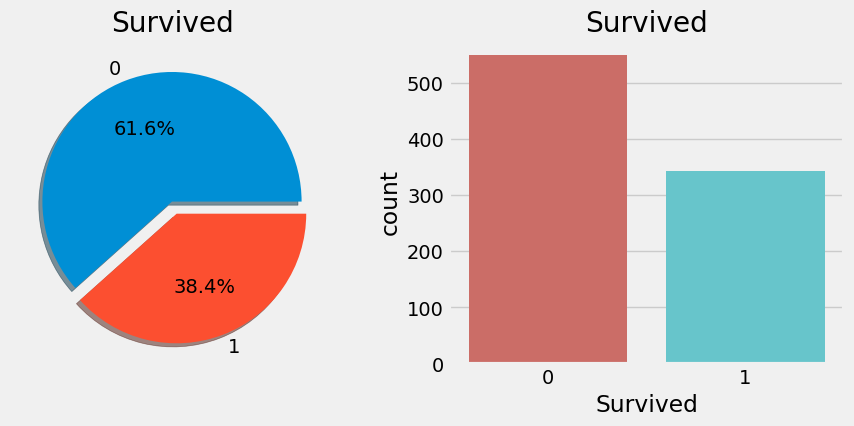

In [13]:
f,ax=plt.subplots(1,2,figsize=(10,4))
train_df['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot(x="Survived", data=train_df, ax=ax[1], palette=palette1)
ax[1].set_title('Survived')
plt.show()

- 각 컬럼 분석

- Sex

In [14]:
train_df.groupby(['Sex','Survived'])['Survived'].value_counts()

Sex     Survived  Survived
female  0         0            81
        1         1           233
male    0         0           468
        1         1           109
Name: Survived, dtype: int64

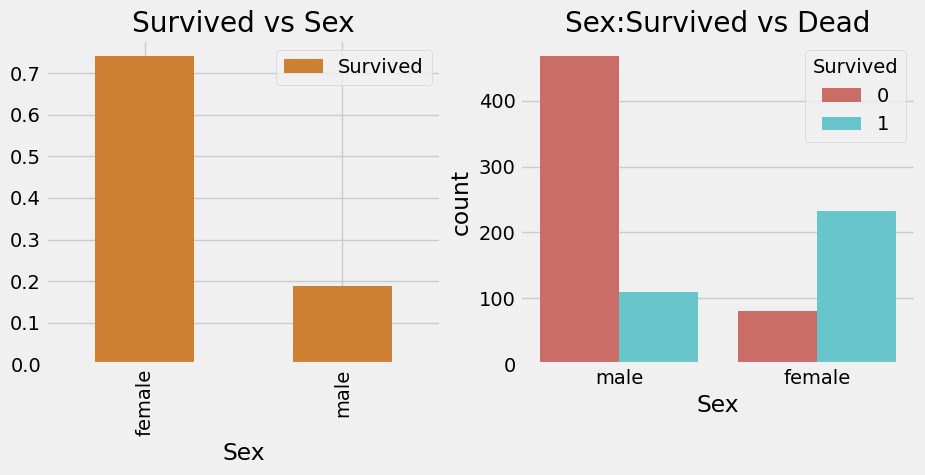

In [15]:
f,ax=plt.subplots(1,2,figsize=(10,4))
train_df[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0], color='#CD7F32')
ax[0].set_title('Survived vs Sex')
sns.countplot(x='Sex',hue='Survived',data=train_df,ax=ax[1],palette=palette1)
ax[1].set_title('Sex:Survived vs Dead')
plt.show()

- Pclass

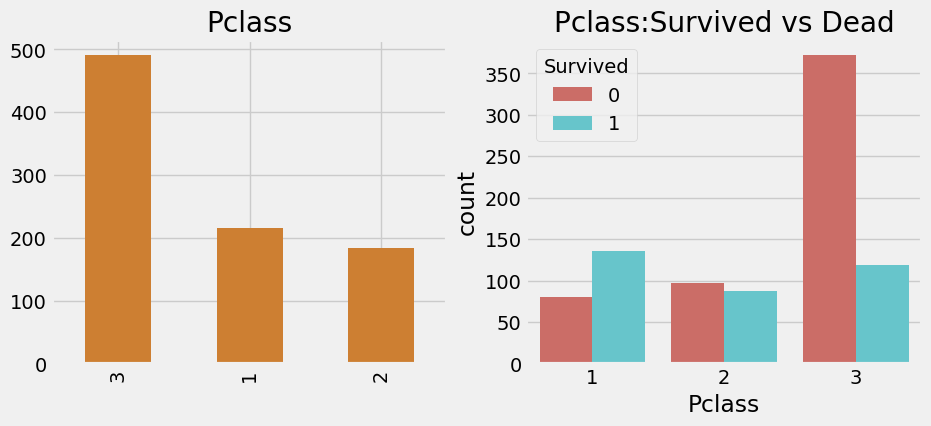

In [16]:
f,ax = plt.subplots(1, 2, figsize=(10,4))
train_df['Pclass'].value_counts().plot.bar(color='#CD7F32',ax=ax[0])
sns.countplot(x='Pclass', hue='Survived', data=train_df, ax=ax[1], palette=palette1)
ax[0].set_title('Pclass')
ax[1].set_title('Pclass:Survived vs Dead')
plt.show()

- Age

In [17]:
print('탑승자 중 최연장자 : {0}세'.format(train_df['Age'].max()))
print('탑승자 중 최연소 : {0}세'.format(train_df['Age'].min()))
print('탑승자 들의 평균 연령 : {0:.2f}세'.format(train_df['Age'].mean()))

탑승자 중 최연장자 : 80.0세
탑승자 중 최연소 : 0.42세
탑승자 들의 평균 연령 : 29.70세


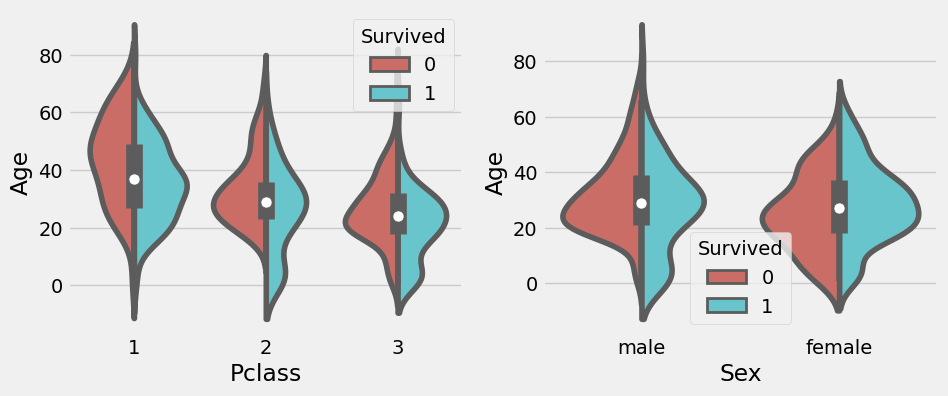

In [18]:
f,ax = plt.subplots(1, 2, figsize=(10,4))
sns.violinplot(x='Pclass', y='Age', hue='Survived', data=train_df, split=True, ax=ax[0] ,palette=palette1)
sns.violinplot(x='Sex', y='Age', hue='Survived', data=train_df, split=True, ax=ax[1] ,palette=palette1)
plt.show()

- Embarked

In [19]:
train_df.groupby(['Embarked','Pclass'])['Survived'].value_counts()

Embarked  Pclass  Survived
C         1       1            59
                  0            26
          2       1             9
                  0             8
          3       0            41
                  1            25
Q         1       0             1
                  1             1
          2       1             2
                  0             1
          3       0            45
                  1            27
S         1       1            74
                  0            53
          2       0            88
                  1            76
          3       0           286
                  1            67
Name: Survived, dtype: int64

Text(0.5, 1.0, 'Embarked vs Survived')

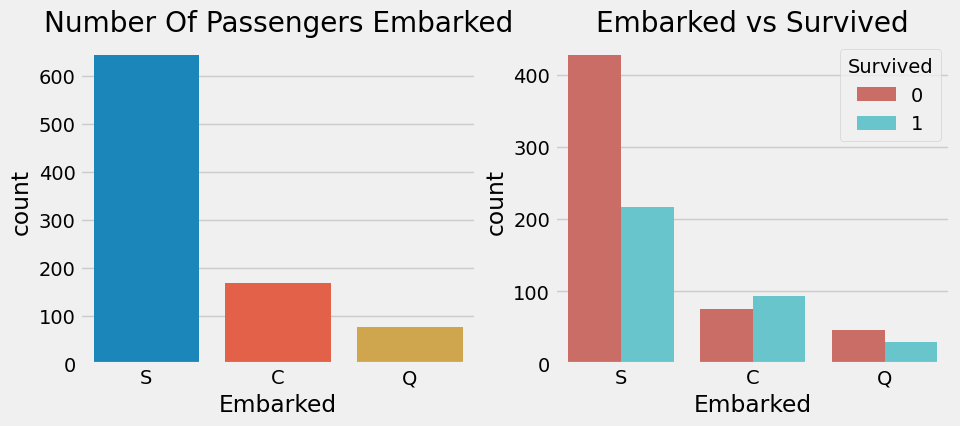

In [20]:
f,ax = plt.subplots(1,2,figsize=(10,4))
sns.countplot(x='Embarked', data=train_df, ax=ax[0])
ax[0].set_title('Number Of Passengers Embarked')
sns.countplot(x='Embarked', hue='Survived', data=train_df, ax=ax[1], palette=palette1)
ax[1].set_title('Embarked vs Survived')

- SibSip

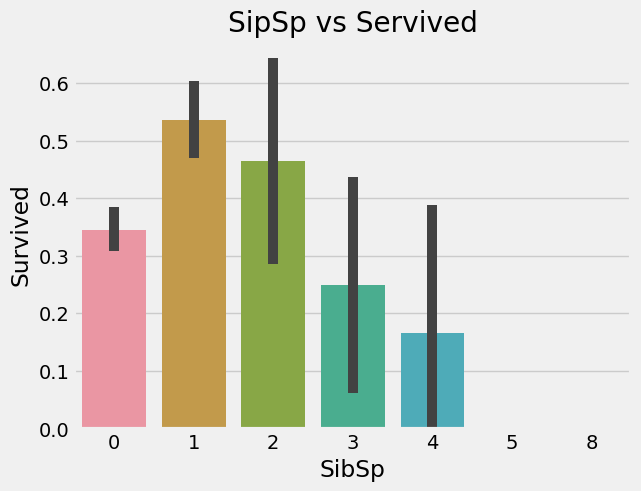

In [21]:
barplot_1 = sns.barplot(x='SibSp', y='Survived', data=train_df)
barplot_1.set_title('SipSp vs Servived')
plt.show()

- Parch

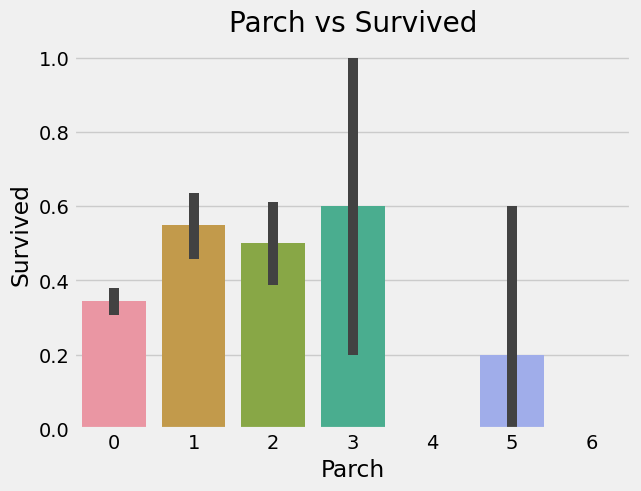

In [22]:
barplot_2 = sns.barplot(x='Parch', y='Survived', data=train_df)
barplot_2.set_title('Parch vs Survived')
plt.show()

- Fare

In [23]:
print('가장 높은 비용 : {0}'.format(train_df['Fare'].max()))
print('가장 낮은 비용 : {0}'.format(train_df['Fare'].min()))
print('평균비용 : {0:.2f}'.format(train_df['Fare'].mean()))

가장 높은 비용 : 512.3292
가장 낮은 비용 : 0.0
평균비용 : 32.20


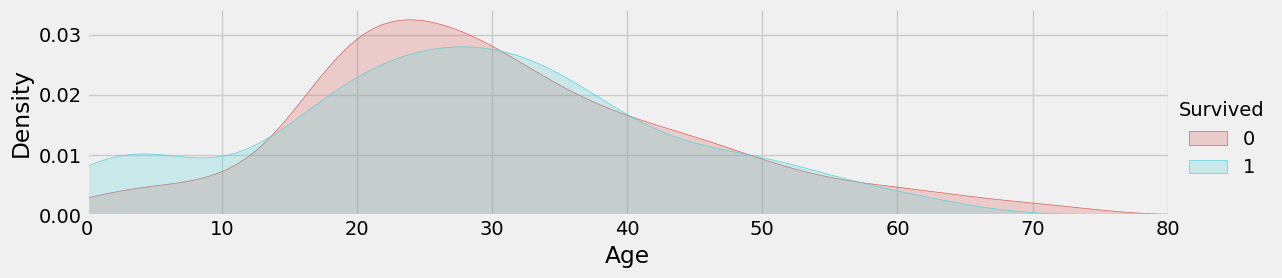

In [24]:
facet = sns.FacetGrid(train_df, hue="Survived",aspect=4, palette=palette1)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train_df['Age'].max()))
facet.add_legend()
plt.show()

- correlation matrix

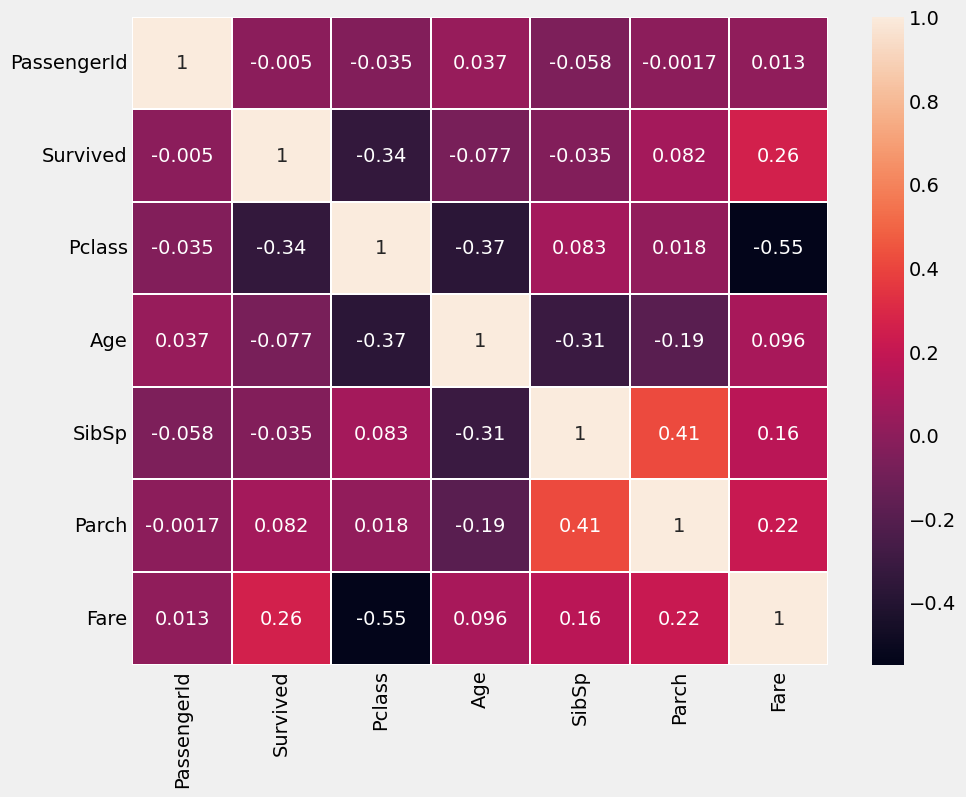

In [25]:
sns.heatmap(train_df.corr(), annot=True, linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

#### EDA 결과

1. Survived
- 사망자와 생존자의 비율은 대략 6:4

2. Sex
- 사망한 male : 468
- 사망한 famale : 81
- => 남자가 압도적으로 많이 사망했음을 알 수 있음 
- 배에 탄 남성의 수는 여성의 수보다 훨씬 많지만 구조된 인원은 여성이 더 많은 것을 확인 할 수 있음
- 여성의 생존율 = 약 75%
- 남성의 생존율 = 약 18%

3. Pclass
- 3등칸에 탑승한 승객의 사망율이 매우 높음을 알 수 있음
- 1등칸에 탑승한 승객은 사망율보다 생존율이 높음을 알 수 있음 

4. Age
- 젊은층의 남성의 사망율이 높음을 알 수 있음 

5. Embarked
- S에서 탑승한 사람의 사망율이 높은것은 그만큼 S에서 탑승한 탑승객의 비율이 많기 때문일 확률이 높음, 그러므로 Embarked가 사망율에 큰 영향을 준다고 보기는 애매함

6. SipSp 
- 형제의 숫자가 늘어날수록 생존율은 낮아짐을 알 수 있음

7. Parch
- 부모자식이 없거나, 5명 이상일 경우에 생존율이 낮아짐을 알 수 있음

8. Age 
- 젊은층의 사망율이 압도적으로 높은것을 확인 할 수 있음
- 성별에서 미루어 보아 대부분 젊은 남자가 사망율이 높음을 확인 할 수 있음


---
## Part2: Feature Engineering and Data Cleaning
---

Nan값 처리
- train data와 test data를 합쳐서 전처리 한 후 다시 분리

In [5]:
def concat_df(train_data, test_data):
    return pd.concat([train_data, test_data], sort=True).reset_index(drop=True)

In [6]:
def divide_df(all_data):
    return all_data.loc[:890], all_data.loc[891:].drop(['Survived'], axis=1)

In [7]:
all_df = concat_df(train_data=train_df, test_data=test_df)

In [8]:
all_df.isnull().sum()

Age             263
Cabin          1014
Embarked          2
Fare              1
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived        418
Ticket            0
dtype: int64

- Age Nan처리

위의 cor matrix를 보면 Age는 Pclass와 높은 상관관계를 가지기 때문에
Pclass별로 성별에 따라 나이의 평균값으로 Nan값을 채우는 것이 좋겠다고 생각함

In [9]:
all_df.groupby(['Pclass','Sex'])['Age'].median()

Pclass  Sex   
1       female    36.0
        male      42.0
2       female    28.0
        male      29.5
3       female    22.0
        male      25.0
Name: Age, dtype: float64

In [10]:
all_df['Age'] = all_df.groupby(['Sex','Pclass'])['Age'].apply(lambda x: x.fillna(x.median()))

- Cabin Nan처리

우선 nan값을 임시의 그룹인 N으로 값 대체

In [11]:
all_df['Cabin'] = all_df['Cabin'].fillna('N')

In [12]:
all_df['Cabin'] = all_df['Cabin'].str[:1]

In [13]:
all_df['Cabin'] = all_df['Cabin'].replace(['A','B','C','T'],'ABC')
all_df['Cabin'] = all_df['Cabin'].replace(['D','E'],'DE')
all_df['Cabin'] = all_df['Cabin'].replace(['F','G'],'FG')

In [14]:
all_df.Cabin.value_counts()

N      1014
ABC     182
DE       87
FG       26
Name: Cabin, dtype: int64

In [15]:
all_df['Embarked'] = all_df['Embarked'].fillna('S')

In [16]:
med = all_df['Fare'].median()
all_df['Fare'] = all_df['Fare'].fillna(med)

In [17]:
all_df.isnull().sum()

Age              0
Cabin            0
Embarked         0
Fare             0
Name             0
Parch            0
PassengerId      0
Pclass           0
Sex              0
SibSp            0
Survived       418
Ticket           0
dtype: int64

In [18]:
all_df['FamilySize'] = all_df['SibSp'] + all_df['Parch'] + 1

In [19]:
all_df.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,FamilySize
0,22.0,N,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,2
1,38.0,ABC,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,2
2,26.0,N,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,1
3,35.0,ABC,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,2
4,35.0,N,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,1


- Name에서 Title 출력

이름에 있는 Title로 그룹을 나눌 수 있음, 직접적인 나이는 알 수 없지만
성별과 나이로 그룹지어지기 때문에 생존에 영향을 미친다고 판단해서 컬럼으로 출력

In [20]:
all_df['Title'] = all_df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

In [21]:
# map = > MR:0, Miss:1, Mrs:2, Other:3
title_mapping = {
      'Mr':'a' , 'Miss':'b', 'Mrs':'c'
    , 'Master':'d', 'Dr':'d', 'Rev':'d'
    , 'Mlle':'d', 'Major':'d', 'Col':'d'
    , 'Countess':'d', 'Capt':'d', 'Ms':'d'
    , 'Sir':'d', 'Lady':'d', 'Mme':'d'
    , 'Don':'d', 'Jonkheer':'d'
}

all_df['Title'] = all_df['Title'].map(title_mapping)

In [22]:
all_df['Title'] = all_df['Title'].fillna('d')

In [23]:
all_df.isnull().sum()

Age              0
Cabin            0
Embarked         0
Fare             0
Name             0
Parch            0
PassengerId      0
Pclass           0
Sex              0
SibSp            0
Survived       418
Ticket           0
FamilySize       0
Title            0
dtype: int64

- 불필요한 컬럼 제거 후 , get_dummies를 통한 원핫인코딩을 하기 위해 문자형 카테고리로 변경

In [24]:
all_df.drop(['Name','PassengerId','Parch','SibSp','Ticket'], axis=1, inplace=True)

In [25]:
all_df.head()

,Age,Cabin,Embarked,Fare,Pclass,Sex,Survived,FamilySize,Title
0,22.0,N,S,7.2500,3,male,0.0,2,a
1,38.0,ABC,C,71.2833,1,female,1.0,2,c
2,26.0,N,S,7.9250,3,female,1.0,1,b
3,35.0,ABC,S,53.1000,1,female,1.0,2,c
4,35.0,N,S,8.0500,3,male,0.0,1,a


In [26]:
sex_mapping={
      'male':'a'
    , 'female':'b'
}

all_df['Sex'] = all_df['Sex'].map(sex_mapping)

In [27]:
# 나이 비 연속데이터 변환
all_df.loc[all_df['Age'] <= 16, 'Age'] = 0
all_df.loc[(all_df['Age']>16)&(all_df['Age']<=26),'Age'] = 1
all_df.loc[(all_df['Age']>26)&(all_df['Age']<=36),'Age'] = 2
all_df.loc[(all_df['Age']>36)&(all_df['Age']<=62),'Age'] = 3
all_df.loc[all_df['Age'] > 62, 'Age'] = 4

In [28]:
all_df['Age'] = all_df['Age'].replace(0,'a')
all_df['Age'] = all_df['Age'].replace(1,'b')
all_df['Age'] = all_df['Age'].replace(2,'c')
all_df['Age'] = all_df['Age'].replace(3,'d')
all_df['Age'] = all_df['Age'].replace(4,'e')

In [29]:
embarked_mapping = {
      'S' : 'a'
    , 'C' : 'b'
    , 'Q' : 'c'
}

all_df['Embarked'] = all_df['Embarked'].map(embarked_mapping)

In [30]:
all_df.loc[all_df['Fare'] <= 17, 'Fare'] = 0
all_df.loc[(all_df['Fare'] > 17) & (all_df['Fare'] <= 30), 'Fare'] = 1
all_df.loc[(all_df['Fare'] > 30) & (all_df['Fare'] <= 100), 'Fare'] = 2
all_df.loc[all_df['Fare'] > 100, 'Fare'] = 3

In [31]:
all_df['Fare'] = all_df['Fare'].replace(0,'a')
all_df['Fare'] = all_df['Fare'].replace(1,'b')
all_df['Fare'] = all_df['Fare'].replace(2,'c')
all_df['Fare'] = all_df['Fare'].replace(3,'d')

In [32]:
cabin_mapping = {
      'ABC' : 'a'
    , 'DE' : 'b' 
    , 'FG' : 'c'
    , 'N' : 'd'
}

all_df['Cabin'] = all_df['Cabin'].map(cabin_mapping)

In [33]:
family_mapping = {
      1:0
    , 2:0.4
    , 3:0.8
    , 4:1.2
    , 5:1.6
    , 6:2.0
    , 7:2.4
    , 8:2.8
    , 9:3.2
    , 10:3.6
    , 11:4.0
}


all_df['FamilySize'] = all_df['FamilySize'].map(family_mapping)

In [34]:
all_df['Pclass'] = all_df['Pclass'].replace(1,'a')
all_df['Pclass'] = all_df['Pclass'].replace(2,'b')
all_df['Pclass'] = all_df['Pclass'].replace(3,'c')

In [35]:
all_df.head()

,Age,Cabin,Embarked,Fare,Pclass,Sex,Survived,FamilySize,Title
0,b,d,a,a,c,a,0.0,0.4,a
1,d,a,b,c,a,b,1.0,0.4,c
2,b,d,a,a,c,b,1.0,0.0,b
3,c,a,a,c,a,b,1.0,0.4,c
4,c,d,a,a,c,a,0.0,0.0,a


In [36]:
X_train, X_test = divide_df(all_data=all_df)
y_train = pd.DataFrame(data=X_train['Survived'])
X_train.drop(['Survived'], axis=1, inplace=True)

In [37]:
X_train.head()

,Age,Cabin,Embarked,Fare,Pclass,Sex,FamilySize,Title
0,b,d,a,a,c,a,0.4,a
1,d,a,b,c,a,b,0.4,c
2,b,d,a,a,c,b,0.0,b
3,c,a,a,c,a,b,0.4,c
4,c,d,a,a,c,a,0.0,a


In [38]:
X_test.head()

,Age,Cabin,Embarked,Fare,Pclass,Sex,FamilySize,Title
891,c,d,c,a,c,a,0.0,a
892,d,d,a,a,c,b,0.4,c
893,d,d,c,a,b,a,0.0,a
894,c,d,a,a,c,a,0.0,a
895,b,d,a,a,c,b,0.8,c


In [39]:
y_train = y_train.astype({'Survived' : 'int64'})

In [40]:
y_train

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


- 원핫 인코딩

In [41]:
X_train_onehot = pd.get_dummies(X_train)
X_test_onehot = pd.get_dummies(X_test)

- 정규화

In [42]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train_onehot) 
X_train_one_scaled = scaler.transform(X_train_onehot)
X_test_one_scaled = scaler.transform(X_test_onehot)

X_train_scaled_one_df = pd.DataFrame(data = X_train_one_scaled, columns=X_train_onehot.columns)
X_test_scaled_one_df = pd.DataFrame(data = X_test_one_scaled, columns=X_test_onehot.columns)

---
## Part3: Modeling
---

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier 
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score , recall_score , confusion_matrix
from sklearn.metrics import f1_score, roc_auc_score

- 모델 평가를 편리하게 실행하기 위해 함수 정의

In [45]:
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [46]:
def get_model_train_eval(model, X_train=None, X_test=None, y_train=None, y_test=None):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    pred_proba = model.predict_proba(X_test)[:,1]
    get_clf_eval(y_test, pred, pred_proba)

In [47]:
def get_accuracy(model_list, X_train=None, X_test=None, y_train=None, y_test=None):
    acc_list = []
    for model in model_list:
        model.fit(X_train,y_train)
        pred = model.predict(X_test)
        acc = accuracy_score(y_test, pred)
        acc_list.append(acc)
    
    for i in range(0,len(acc_list)):
        print(model_list[i].__class__,':',acc_list[i])

- 평가를 위해 기존 train 데이터를 8:2로 다시 분리

In [48]:
XX_train_one, XX_test_one, yy_train, yy_test = train_test_split(X_train_one_scaled, y_train, test_size=0.2, random_state=42)

- 베이스 모델링

In [49]:
lg_clf = LogisticRegression(random_state=42)
rf_clf = RandomForestClassifier(random_state=42)
xgb_clf = XGBClassifier(random_state=42)
lgb_clf = LGBMClassifier(random_state=42)

models = [lg_clf, rf_clf, xgb_clf, lgb_clf]

In [50]:
get_accuracy(
      model_list=models
    , X_train=XX_train_one
    , X_test=XX_test_one
    , y_train=yy_train
    , y_test=yy_test
)

[15:42:05] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
<class 'sklearn.linear_model._logistic.LogisticRegression'> : 0.7988826815642458
<class 'sklearn.ensemble._forest.RandomForestClassifier'> : 0.8156424581005587
<class 'xgboost.sklearn.XGBClassifier'> : 0.8379888268156425
<class 'lightgbm.sklearn.LGBMClassifier'> : 0.8324022346368715


- XGB모델이 제일 성능이 좋은 것을 확인

- 파라미터 최적화

In [51]:
from sklearn.model_selection import GridSearchCV

In [52]:
params = {
      'max_depth' : [5,7,9]
    , 'learning_rate' : [0.01,0.03,0.05,]
    , 'n_estimators' : [100,200,300]
    , 'subsample' : [0.2,0.4,0.6]
    , 'colsample_bytree' : [0.3,0.5,0.7]
    , 'min_child_weight' : [3,5,7]
}

In [53]:
xgb_clf=XGBClassifier(random_state=42)

In [54]:
gscv = GridSearchCV (estimator = xgb_clf, param_grid = params, scoring ='accuracy', cv = 3, n_jobs=3)
gscv.fit(X_train_scaled_one_df, y_train)

[15:44:21] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False, gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,...
                                     random_state=42, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=None,
                                     subsample=None, tree_method=None,
                                     validate_parameters=None, verbosity=None),
             n_jobs=3,
             param_grid={'colsample_bytree': [0.3, 0.5, 0.7],
                         'learning_rate': [0.01, 0.03, 0.05],
                         'max_depth': [5, 7, 9], 'min_child_weight': [3, 5, 7],
                         'n_estimators': [100, 200, 300],
                         'subsample': [0.2, 0.4, 0.6]},
             scoring='accuracy')

In [55]:
gscv.best_score_

0.8383838383838383

In [56]:
gscv.best_params_

{'colsample_bytree': 0.3,
 'learning_rate': 0.03,
 'max_depth': 5,
 'min_child_weight': 3,
 'n_estimators': 300,
 'subsample': 0.6}

- 최적화 파라미터를 찾기 전까지 반복 수행

In [57]:
params2 = {
      'max_depth' : [4,5,6]
    , 'learning_rate' : [0.02,0.03,0.04]
    , 'n_estimators' : [300]
    , 'subsample' : [0.6,0.8]
    , 'colsample_bytree' : [0.1,0.3]
    , 'min_child_weight' : [3,5,7]
}

In [58]:
gscv = GridSearchCV (estimator = xgb_clf, param_grid = params2, scoring ='accuracy', cv = 3, n_jobs=3)
gscv.fit(X_train_scaled_one_df, y_train)

[15:46:33] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False, gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,...
                                     num_parallel_tree=None, predictor=None,
                                     random_state=42, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=None,
                                     subsample=None, tree_method=None,
                                     validate_parameters=None, verbosity=None),
             n_jobs=3,
             param_grid={'colsample_bytree': [0.1, 0.3],
                         'learning_rate': [0.02, 0.03, 0.04],
                         'max_depth': [4, 5, 6], 'min_child_weight': [3, 5, 7],
                         'n_estimators': [300], 'subsample': [0.6, 0.8]},
             scoring='accuracy')

In [59]:
gscv.best_score_

0.8417508417508417

In [60]:
gscv.best_params_

{'colsample_bytree': 0.3,
 'learning_rate': 0.03,
 'max_depth': 4,
 'min_child_weight': 3,
 'n_estimators': 300,
 'subsample': 0.8}

In [61]:
params3 = {
      'max_depth' : [3,4]
    , 'learning_rate' : [0.03]
    , 'n_estimators' : [300]
    , 'subsample' : [0.7,0.8,0.9]
    , 'colsample_bytree' : [0.3]
    , 'min_child_weight' : [3]
}

In [62]:
gscv = GridSearchCV (estimator = xgb_clf, param_grid = params3, scoring ='accuracy', cv = 3, n_jobs=3)
gscv.fit(X_train_scaled_one_df, y_train)

[15:48:46] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False, gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,...
                                     num_parallel_tree=None, predictor=None,
                                     random_state=42, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=None,
                                     subsample=None, tree_method=None,
                                     validate_parameters=None, verbosity=None),
             n_jobs=3,
             param_grid={'colsample_bytree': [0.3], 'learning_rate': [0.03],
                         'max_depth': [3, 4], 'min_child_weight': [3],
                         'n_estimators': [300], 'subsample': [0.7, 0.8, 0.9]},
             scoring='accuracy')

In [63]:
gscv.best_score_

0.8428731762065095

In [64]:
gscv.best_params_

{'colsample_bytree': 0.3,
 'learning_rate': 0.03,
 'max_depth': 3,
 'min_child_weight': 3,
 'n_estimators': 300,
 'subsample': 0.8}

In [66]:
best_ = {
      'colsample_bytree': 0.3
    , 'learning_rate': 0.03
    , 'max_depth': 3
    , 'min_child_weight': 3
    , 'n_estimators': 300
    , 'subsample': 0.8
    , 'random_state' : 42
}

In [67]:
best_xgb_clf = XGBClassifier(**best_)
get_model_train_eval(
      model=best_xgb_clf
    , X_train=XX_train_one
    , y_train=yy_train
    , X_test=XX_test_one
    , y_test=yy_test
)

[15:52:39] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
오차 행렬
[[92 13]
 [18 56]]
정확도: 0.8268, 정밀도: 0.8116, 재현율: 0.7568, F1: 0.7832, AUC:0.8838


In [69]:
best_xgb_clf = XGBClassifier(**best_)
best_xgb_clf.fit(X_train_scaled_one_df, y_train)
pred_xgb = best_xgb_clf.predict(X_test_scaled_one_df)
pred_xgb

[15:54:13] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,

---
## Part4: Predict and Submissions
---

In [70]:
submission = pd.DataFrame({
      'PassengerId' : test_org['PassengerId'] 
    , 'Survived' : pred_xgb
})

submission.to_csv('submission_k.csv', index=False)